# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import random
import json
import api_keys


#response = requests.get(api_keys.url + "lompoc" + "&APPID=" + api_keys.Weather_api)
#response
#print(api_keys.url + "lompoc&" + "APPID=" + api_keys.Weather_api)

#https://tile.openweathermap.org/map/{layer}/{z}/{x}/{y}.png?appid={api_key}
# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

In [2]:
column_names = ["City", "Country"]
weather_df = pd.DataFrame(columns=column_names)

In [3]:
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    weather_df = weather_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

In [4]:
weather_df = weather_df.drop_duplicates(subset='City').reset_index()
weather_df.count()

index      629
City       629
Country    629
dtype: int64

In [5]:
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
city_data_df = pd.DataFrame(columns=column_names)

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
row_count = 1

In [7]:
print("Beginning Data Retrieval")
for index, row in weather_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_keys.Weather_api + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")
        
    else:
        city_data_df.at[index, "City"] = city_data["name"]
        city_data_df.at[index, "Country"] = city_data["sys"]["country"]
        city_data_df.at[index, "Temperature (F)"] = city_data["main"]["temp"]
        city_data_df.at[index, "Latitude"] = city_data["coord"]["lat"]
        city_data_df.at[index, "Longitude"] = city_data["coord"]["lon"]
        city_data_df.at[index, "Humidity (%)"] = city_data["main"]["humidity"]
        city_data_df.at[index, "Cloudiness (%)"] = city_data["clouds"]["all"]
        city_data_df.at[index, "Wind Speed (mph)"] = city_data["wind"]["speed"]
                
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        #print(target_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Tuatapere NZ
------------------------
Proceesing: City #  2  |  Upernavik GL
------------------------
Proceesing: City #  3  |  Bluff AU
------------------------
Proceesing: City #  4  |  Bongandanga CD
------------------------
Proceesing: City #  5  |  Hilo US
------------------------
Proceesing: City #  6  |  Ponta do Sol BR
City not found, skipping...
------------------------
Proceesing: City #  7  |  Vila Franca do Campo PT
------------------------
Proceesing: City #  8  |  Tiruvannamalai IN
------------------------
Proceesing: City #  9  |  Punta Arenas CL
City not found, skipping...
------------------------
Proceesing: City #  10  |  Kapaa US
------------------------
Proceesing: City #  11  |  Bubaque GW
------------------------
Proceesing: City #  12  |  Port Lincoln AU
------------------------
Proceesing: City #  13  |  Ovre Ardal NO
------------------------
Proceesing: City #  14  |  Ponta Delgada PT
-

------------------------
Proceesing: City #  120  |  Taltal CL
------------------------
Proceesing: City #  121  |  Calbuco CL
------------------------
Proceesing: City #  122  |  Bollnas SE
------------------------
Proceesing: City #  123  |  Juneau US
City not found, skipping...
------------------------
Proceesing: City #  124  |  Arman RU
------------------------
Proceesing: City #  125  |  Pyapon MM
------------------------
Proceesing: City #  126  |  Elat CM
------------------------
Proceesing: City #  127  |  Jamestown AU
------------------------
Proceesing: City #  128  |  Prince Rupert CA
------------------------
Proceesing: City #  129  |  Bambous Virieux MU
------------------------
Proceesing: City #  130  |  Kungurtug RU
------------------------
Proceesing: City #  131  |  Wilmington US
------------------------
Proceesing: City #  132  |  Lompoc US
------------------------
Proceesing: City #  133  |  Moroni US
------------------------
Proceesing: City #  134  |  Chupa PE
---

------------------------
Proceesing: City #  237  |  Rzhev RU
------------------------
Proceesing: City #  238  |  Nishihara JP
------------------------
Proceesing: City #  239  |  Sao Joao da Barra BR
------------------------
Proceesing: City #  240  |  Banda Aceh ID
------------------------
Proceesing: City #  241  |  Pacific Grove US
------------------------
Proceesing: City #  242  |  Fuerte Olimpo BR
------------------------
Proceesing: City #  243  |  Veraval FR
------------------------
Proceesing: City #  244  |  Agadez NE
------------------------
Proceesing: City #  245  |  Ulladulla AU
------------------------
Proceesing: City #  246  |  Saint George GR
------------------------
Proceesing: City #  247  |  Alofi NU
------------------------
Proceesing: City #  248  |  Nouadhibou MR
------------------------
Proceesing: City #  249  |  Deputatskiy RU
------------------------
Proceesing: City #  250  |  Tessalit ML
------------------------
Proceesing: City #  251  |  Salalah OM
---

------------------------
Proceesing: City #  360  |  Warkworth NZ
------------------------
Proceesing: City #  361  |  Oskarshamn SE
------------------------
Proceesing: City #  362  |  Saravan AM
------------------------
Proceesing: City #  363  |  Douentza ML
City not found, skipping...
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  364  |  Bali CN
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  365  |  Aksha RU
------------------------
Proceesing: City #  366  |  Luderitz NA
------------------------
Proceesing: City #  367  |  Saint-Pierre FR
------------------------
Proceesing: City #  368  |  Lufilufi WS
City not found, skipping...
------------------------
Proceesing: City #  369  |  Rafraf TN
------------------------
Proceesing: City #  370  |  Koutiala ML
------------------------
Proceesing: City #  371  |  Tezu IN
------------------------
Proceesing: City #  372  |  Araoua

------------------------
Proceesing: City #  479  |  Pespire HN
------------------------
Proceesing: City #  480  |  Payo ID
------------------------
Proceesing: City #  481  |  Chara GR
------------------------
Proceesing: City #  482  |  Wiarton CA
------------------------
Proceesing: City #  483  |  Elizabeth City US
------------------------
Proceesing: City #  484  |  Koslan RU
City not found, skipping...
------------------------
Proceesing: City #  485  |  Natyrbovo RU
------------------------
Proceesing: City #  486  |  Ardakan IR
------------------------
Proceesing: City #  487  |  Iranshahr IR
------------------------
Proceesing: City #  488  |  Roald NO
------------------------
Proceesing: City #  489  |  Dagana MR
------------------------
Proceesing: City #  490  |  Lagunas PE
------------------------
Proceesing: City #  491  |  Dingzhou CN
------------------------
Proceesing: City #  492  |  Waipawa NZ
------------------------
Proceesing: City #  493  |  Itoman JP
----------

In [8]:
 city_data_df.count()

City                554
Country             554
Temperature (F)     554
Latitude            554
Longitude           554
Humidity (%)        554
Cloudiness (%)      554
Wind Speed (mph)    554
dtype: int64

In [9]:
city_data_df = city_data_df.reset_index(drop=True)
city_data_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tuatapere,NZ,69.49,-46.13,167.69,60,0,14.81
1,Upernavik,GL,9.37,72.79,-56.15,100,56,10.89
2,Bluff,AU,84.48,-23.58,149.07,71,56,6.31
3,Bongandanga,CD,71.11,1.51,21.07,95,20,4.18
4,Hilo,US,66.11,19.71,-155.08,73,90,11.41
5,Ponta do Sol,BR,67.51,-20.63,-46,90,44,2.95
6,Vila Franca do Campo,PT,54.34,37.72,-25.43,62,40,5.82
7,Tiruvannamalai,IN,82.99,12.23,79.08,61,0,4.85
8,Punta Arenas,CL,42.4,-53.16,-70.91,75,90,9.17
9,Kapaa,US,70.59,22.08,-159.32,60,20,21.92


In [10]:
city_data_df.to_csv("City_Data.csv")

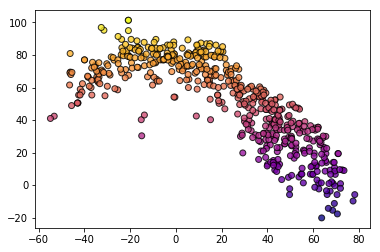

In [11]:
#Latitude compared to Temperature
plt.scatter(city_data_df["Latitude"], 
            city_data_df["Temperature (F)"], c=city_data_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

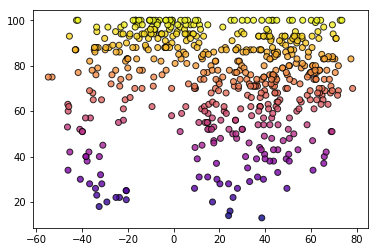

In [12]:
#Latitude compared to Humidity
plt.scatter(city_data_df["Latitude"], 
            city_data_df["Humidity (%)"], c=city_data_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

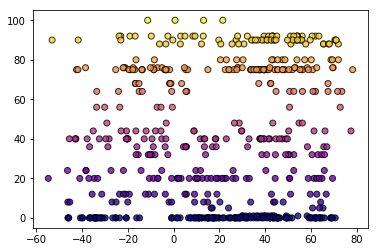

In [13]:
#Latitude compared to Cloudiness
plt.scatter(city_data_df["Latitude"], 
            city_data_df["Cloudiness (%)"], c=city_data_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

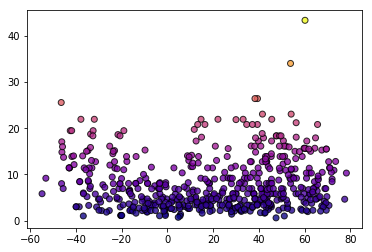

In [14]:
plt.scatter(city_data_df["Latitude"], 
            city_data_df["Wind Speed (mph)"], c=city_data_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

## Generate Cities List

In [32]:
#See all code above

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
#See all code above

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
#See Code Above

In [35]:
#See Code Above

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [36]:
#See Code Above

#### Latitude vs. Humidity Plot

In [37]:
#See Code Above

#### Latitude vs. Cloudiness Plot

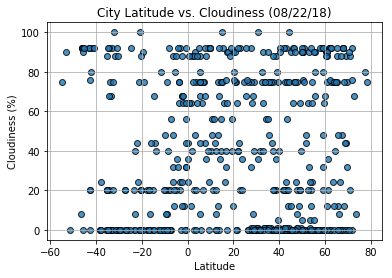

In [8]:
#See Code Above

#### Latitude vs. Wind Speed Plot

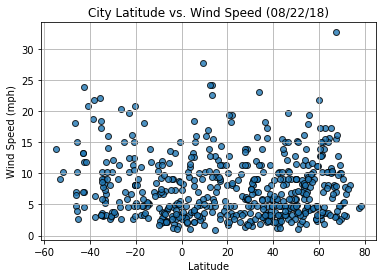

In [9]:
#See Code Above